In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from mlxtend.plotting import plot_confusion_matrix

In [59]:
iris = datasets.load_iris()


In [60]:
x = iris.data[:,[2,3]]
y = iris.target


In [61]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.33,random_state=21)


model = LogisticRegression(solver='lbfgs',max_iter=500,multi_class='multinomial',penalty = 'l2').fit(xtrain,ytrain)

In [62]:
ypred = model.predict(xtest)

In [63]:
clf_report = classification_report(ytest ,ypred)

In [64]:
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.82      0.90        17
           2       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



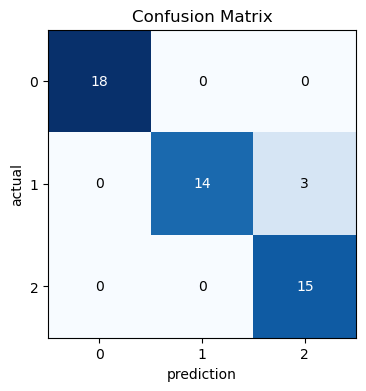

In [65]:

cm = confusion_matrix(ytest,ypred)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel("prediction")
plt.ylabel("actual")
plt.title("Confusion Matrix")
plt.show()

In [66]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xx.shape,yy.shape

((440, 790), (440, 790))

In [67]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(yy.shape)

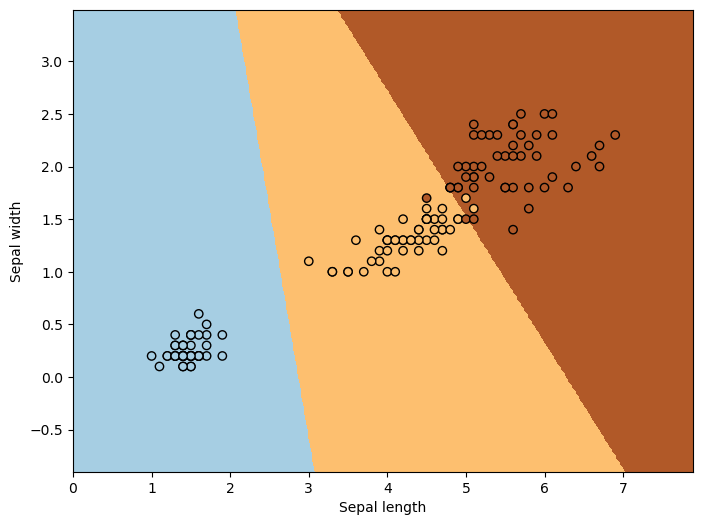

In [68]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()